In [174]:
# Importando librerias
import pandas as pd

In [175]:
datos_inmuebles_dummies = pd.read_csv("datos_inmuebles_dummies.csv")
datos_inmuebles_dummies.head()

,Apartamento,Casa,Outros,Zona Central,Zona Norte,Zona Oeste,Zona Sul,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


# Arbol de Decisión para Regresión






## Dividendo los datos

In [176]:
#variables independientes
X = datos_inmuebles_dummies.drop('price', axis=1)

#variable dependiente
y = datos_inmuebles_dummies['price']

In [177]:
# importando
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Implementando el Modelo


In [178]:
# importando el modelo
from sklearn.tree import DecisionTreeRegressor

In [179]:
# Inicializando el modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth = 5)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [180]:
# Prueba
prediccion_dtr = dtr.predict(X_test)

In [181]:
prediccion_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de error de predicción**: un gráfico de error de predicción muestra los objetivos reales frente a los valores predichos. En un modelo perfecto, estos puntos estarían alineados a 45 grados.



c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


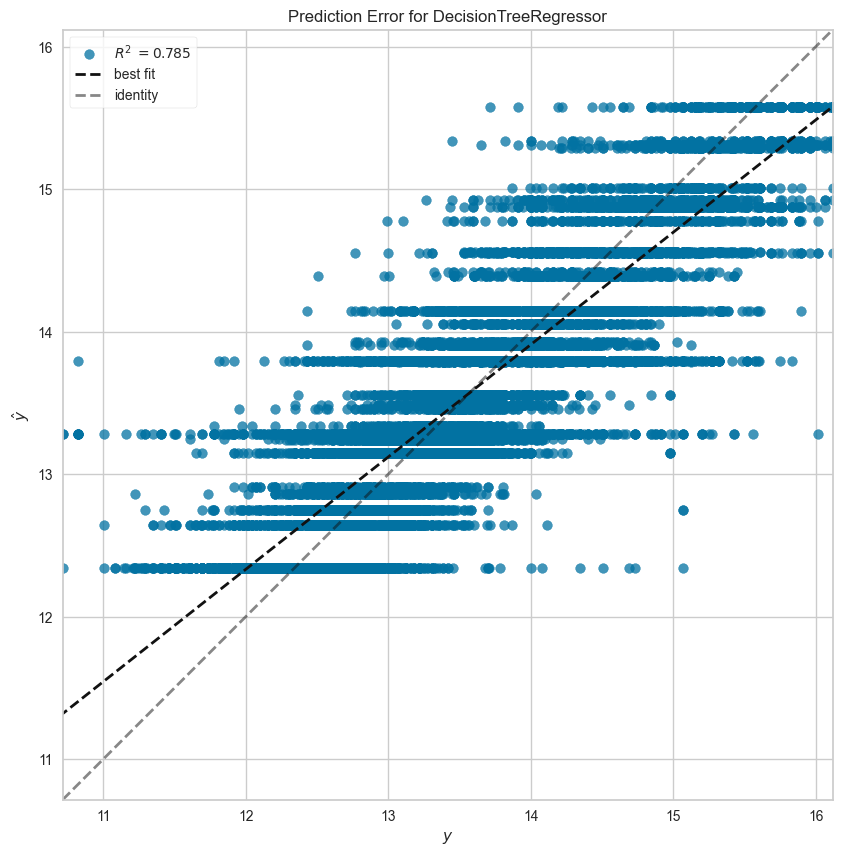

<Axes: title={'center': 'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [182]:
from yellowbrick.regressor import PredictionError
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(dtr)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()


## Métrica de Desempeño

In [183]:
# Coeficiente de determinacion
from sklearn.metrics import r2_score
r2_dtr = r2_score(y_test, prediccion_dtr)
r2_dtr

0.7846916218477398

# Random Forest para Regresión


## Modelo Ensamble

## Predicción

In [184]:
from sklearn.ensemble import RandomForestRegressor

In [185]:
rf = RandomForestRegressor(random_state = 42,
                           max_depth = 5,
                           n_estimators = 10)

In [186]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [187]:
prediccion_rf = rf.predict(X_test)
prediccion_rf

array([13.53707348, 12.34106458, 13.15366323, ..., 13.23975692,
       12.34106458, 14.6148927 ])

**Gráfico de error de predicción**

c:\Users\emili\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


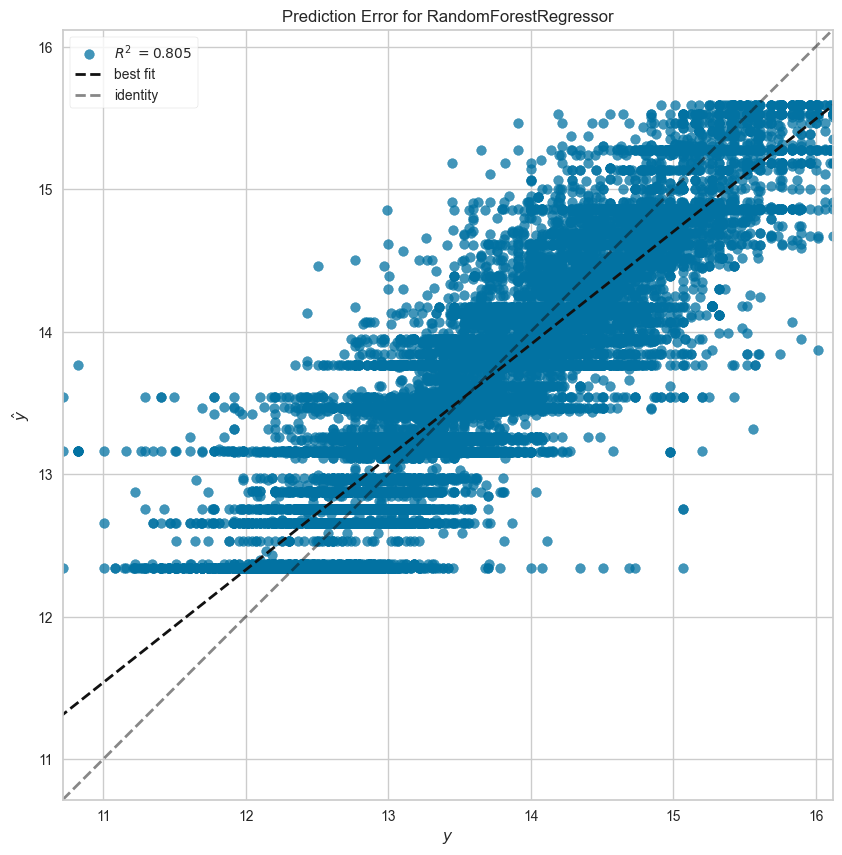

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [188]:
fig, ax = plt.subplots(figsize=(10,10))
pev = PredictionError(rf)
pev.fit(X_train, y_train)
pev.score(X_test, y_test)
pev.poof()

## 4.3 - Métrica de desempeño

In [189]:
# coeficiente de determinacion
r2_rf = r2_score(y_test, prediccion_rf)
r2_rf


0.805273364453047

# Técnicas de Optimización


## Herramientas de Optimización

### Optimizando el árbol de decisión

In [190]:
from sklearn.model_selection import KFold

# Definiendo el K numero de subconjuntos
cv = KFold(n_splits=5, shuffle=True)

### Cross validation


In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
accuracy_cross_val_r2 = cross_val_score(estimator = dtr,
                                        X = X_train,
                                        y = y_train,
                                        scoring = "r2",
                                        cv = cv)
accuracy_cross_val_r2.mean()

0.782118104877197

### Random Search Validation

In [193]:
#selección de hiperparametros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2'],
}

In [194]:
from sklearn.model_selection import RandomizedSearchCV

In [195]:
random_cv_dt = RandomizedSearchCV(
    dtr,
    param_random_dt,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

In [196]:
randomcv_dtr = random_cv_dt.fit(X_train, y_train)

In [197]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,91.192357,3.469289,0.021799,0.006275,12,8,sqrt,6,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.745225,0.759138,0.750642,0.759973,0.752383,0.753472,0.005506,5
1,0.352586,0.024642,0.019112,0.007810,16,6,sqrt,14,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.842462,0.842860,0.841226,0.846620,0.839661,0.842566,0.002314,1
2,89.658640,0.532778,0.017915,0.004528,14,10,sqrt,14,absolute_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.831848,0.835514,0.832945,0.836311,0.834938,0.834311,0.001660,2
3,81.699840,10.594489,0.016341,0.005408,12,6,log2,14,absolute_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.829772,0.837987,0.830308,0.832830,0.824246,0.831028,0.004467,3
4,0.332105,0.044622,0.016779,0.004667,14,8,log2,10,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.829619,0.822860,0.809368,0.819580,0.830671,0.822420,0.007727,4


In [198]:
#la mejor combinación
randomcv_dtr.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'squared_error'}

In [199]:
#el mejor score
randomcv_dtr.best_score_

0.8425659136865316

### Random Search Test

In [221]:
dtr_optimizado = DecisionTreeRegressor(min_samples_split = 16,
 min_samples_leaf = 6,
 max_features = 'sqrt',
 max_depth = 14,
 criterion= 'squared_error')

In [222]:
dtr_optimizado.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, max_features='sqrt', min_samples_leaf=6,
                      min_samples_split=16)

In [223]:
prediccion_dtr_optimizado = dtr_optimizado.predict(X_test)

In [224]:
r2_score(y_test, prediccion_dtr_optimizado)

0.8374672385417217

## Optimizando el Bosque de árboles de decisión

### Cross validation

In [206]:
accuracyRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_train,
                                       y = y_train,
                                       scoring = 'r2',
                                       cv = cv)
print('Accuracy promedio de r2: {}'.format(round(accuracyRF_cross_val_r2.mean(), 3)))

Accuracy promedio de r2: 0.798


### Random Search Validation

Definiendo los parámetros

In [207]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [208]:
random_cv_rf = RandomizedSearchCV(
    rf,
    param_random_rf,
    n_iter=5,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [209]:
rf_randomcv = random_cv_rf.fit(X_train, y_train)

In [216]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,229.106636,7.194677,1.393280,0.091730,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895375,0.892547,0.895283,0.896100,0.895445,0.894950,0.001235,2
1,213.684672,7.554981,1.437731,0.146800,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.895455,0.892612,0.895199,0.896237,0.895408,0.894982,0.001237,1
2,152.320503,4.473799,1.128618,0.232455,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.895219,0.892495,0.895037,0.896001,0.895354,0.894821,0.001208,3
3,204.757708,9.745381,1.760827,0.603768,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.895079,0.892263,0.894829,0.895706,0.895070,0.894590,0.001199,4
4,163.952533,24.395346,0.987001,0.282759,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.894794,0.892136,0.894624,0.895459,0.894899,0.894382,0.001157,5


In [210]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [211]:
rf_randomcv.best_score_

0.8949823998334108

### Random Search Test

In [212]:
rf_optimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [213]:
rf_optimizado2.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [214]:
prediccion_rf_optimizado2 = rf_optimizado2.predict(X_test)

In [215]:
r2_score(y_test, prediccion_rf_optimizado2)

0.8950694410295597

## Escogiendo el mejor modelo

In [218]:
#tabla de resultados
print('Random Search')
print("="*30)
print("Arbol de Decisión: %f" % r2_score(y_test, prediccion_dtr_optimizado))
print("Random Forest: %f" % r2_score(y_test, prediccion_rf_optimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Arbol de Decisión: %f" % round(accuracy_cross_val_r2.mean(), 3))
print("Random Forest: %f" % round(accuracyRF_cross_val_r2.mean(), 3))

Random Search
Arbol de Decisión: 0.845504
Random Forest: 0.895069
******************************
Cross Validation
Arbol de Decisión: 0.782000
Random Forest: 0.798000


In [227]:
#Probando el mejor modelo
cliente = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitsOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitsOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [ ]:
#Verificando el resultado
prediccion_cliente = rf_optimizado2.predict(cliente)
